<a href="https://colab.research.google.com/github/Connect2p/STOCK-PRICE-PREDICTATION/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import numpy as np
stock_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RELIANCE.NS.csv",index_col='Date')

In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-06,1099.942261,1123.714966,1092.856201,1117.771729,1098.146851,11593409
2019-09-09,1116.080200,1127.372192,1109.222778,1117.497437,1097.877441,5873964
2019-09-11,1117.771729,1133.772583,1117.771729,1128.652344,1108.836426,6063950
2019-09-12,1129.200928,1134.183960,1102.411011,1106.662598,1087.232788,5940002
2019-09-13,1108.171265,1123.257690,1103.508179,1120.606201,1100.931519,6473857


In [ ]:
#SUMMARY STATS
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,2141.762092,2163.755670,2118.669665,2140.450542,2121.430970,9.855922e+06
std,492.065838,493.551953,490.621194,492.305428,496.225945,8.059985e+06
min,837.711609,868.616089,800.635437,808.315857,794.124084,8.528280e+05
25%,1854.191009,1877.992829,1832.846619,1848.802918,1823.734375,5.140531e+06
50%,2222.583252,2238.274170,2192.147339,2217.899048,2196.069825,7.239730e+06
75%,2412.080261,2434.019226,2387.969421,2413.013855,2395.345093,1.110363e+07
max,3208.899902,3217.600098,3171.000000,3201.800049,3190.969971,7.134168e+07


In [ ]:
# General info
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1236 entries, 2019-09-06 to 2024-09-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1236 non-null   float64
 1   High       1236 non-null   float64
 2   Low        1236 non-null   float64
 3   Close      1236 non-null   float64
 4   Adj Close  1236 non-null   float64
 5   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.9+ KB


Text(0.5, 1.0, 'Closing Price of RELIANCE')

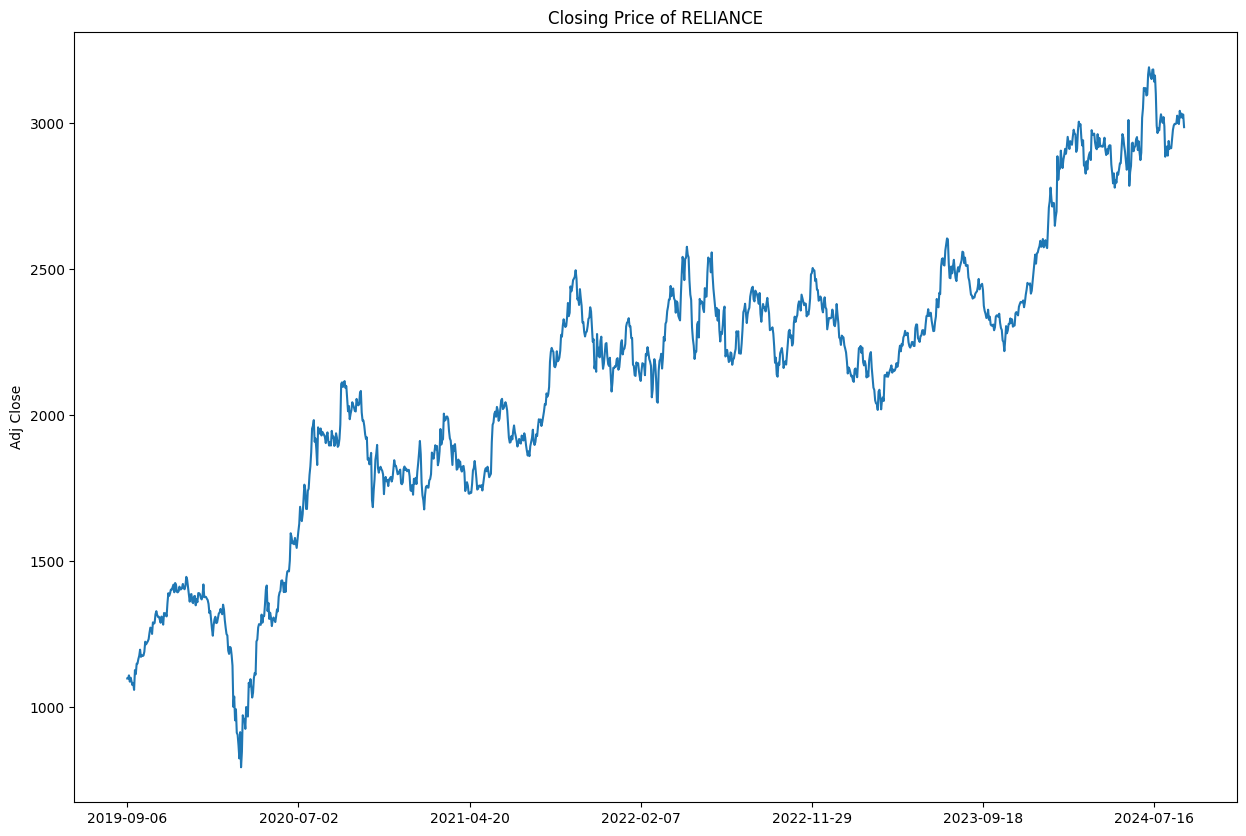

In [ ]:
# Let's see a historical view of the closing price
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
stock_data["Adj Close"].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of RELIANCE")

Text(0.5, 1.0, 'Volume of RELIANCE')

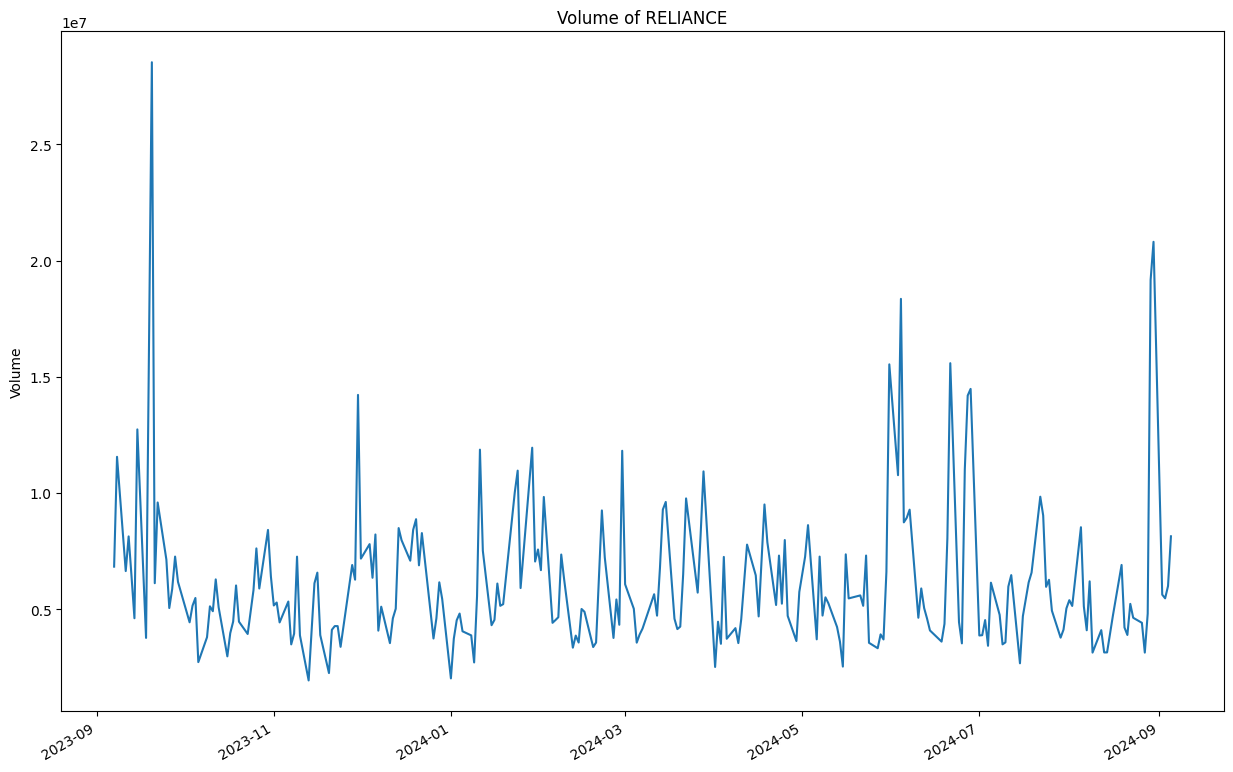

In [ ]:
# Now let's plot the total volume of stock being traded each day of last 1 year
one_year_ago = pd.to_datetime('today') - pd.DateOffset(years=1)
stock_data.index = pd.to_datetime(stock_data.index)

filtered_data = stock_data.loc[one_year_ago:]

plt.figure(figsize=(15, 10))
filtered_data["Volume"].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Volume of RELIANCE")





<Axes: xlabel='Date'>

<Figure size 1500x1000 with 0 Axes>

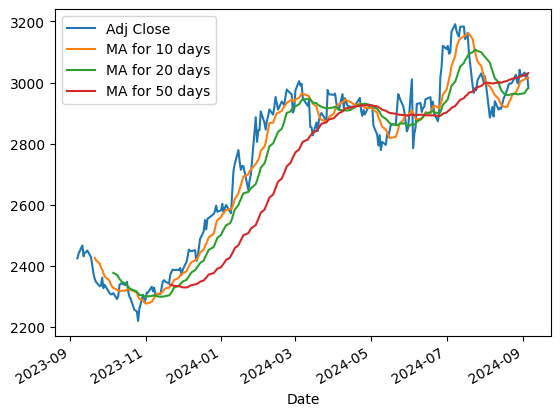

In [ ]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    filtered_data.loc[:, column_name] = filtered_data['Adj Close'].rolling(ma).mean()

plt.figure(figsize=(15, 10))
filtered_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False)

In [ ]:
!pip install --upgrade pandas_datareader

In [ ]:
# Get the stock quote
!pip install yfinance
import yfinance as yf
from datetime import datetime
df = yf.download('RELIANCE.NS', start='2019-01-01', end=datetime.now())
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1028.852905,1030.727295,1015.000732,1024.966919,1000.963074,4873335
2019-01-02,1019.023804,1030.453003,1006.680298,1011.617737,987.926453,7814409
2019-01-03,1012.623474,1019.115234,996.714111,999.137085,975.738159,8144143
2019-01-04,1003.388733,1009.834778,988.485107,1004.531616,981.006348,9258272
2019-01-07,1012.166321,1022.635437,1006.680298,1010.109070,986.453064,6030145


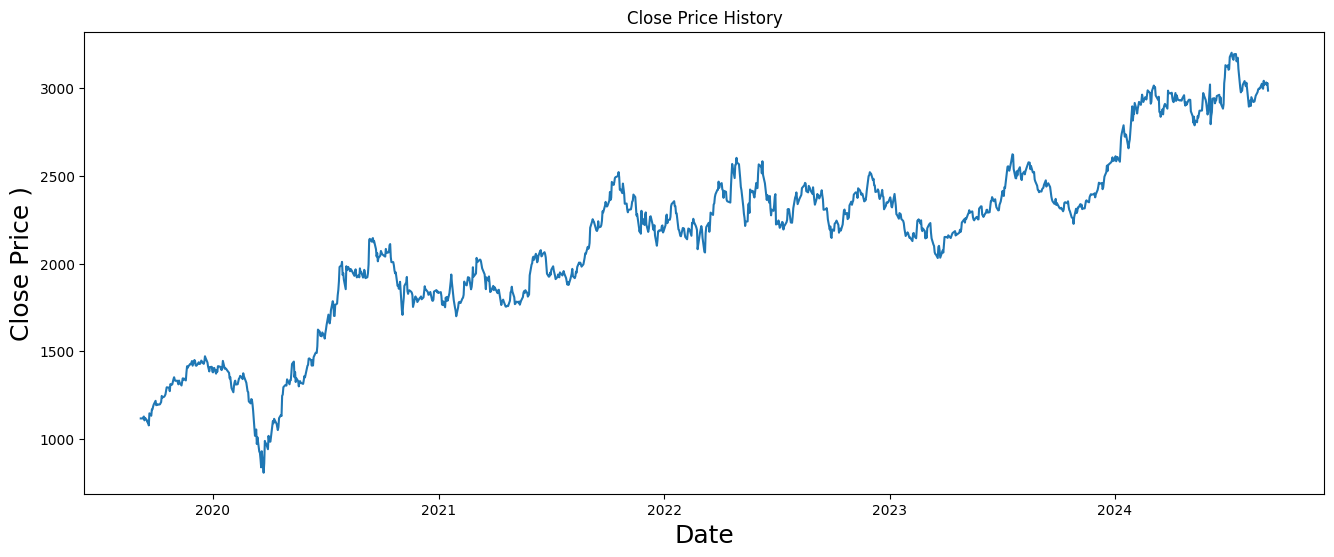

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(stock_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price )', fontsize=18)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

1122

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.09051702],
       [0.08493972],
       [0.07972529],
       ...,
       [0.92331261],
       [0.92784579],
       [0.90981762]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
print(x_train.shape,y_train.shape)

(1062, 60, 1) (1062,)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 63s 56ms/step - loss: 0.0078
Epoch 2/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 66s 62ms/step - loss: 0.0013
Epoch 3/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 77s 57ms/step - loss: 5.9857e-04
Epoch 4/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - loss: 6.8451e-04
Epoch 5/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - loss: 4.3062e-04
Epoch 6/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - loss: 4.1719e-04
Epoch 7/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - loss: 4.3953e-04
Epoch 8/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 85s 60ms/step - loss: 4.3337e-04
Epoch 9/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 78s 57ms/step - loss: 4.7547e-04
Epoch 10/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 61s 57ms/step - loss: 4.6987e-04


In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


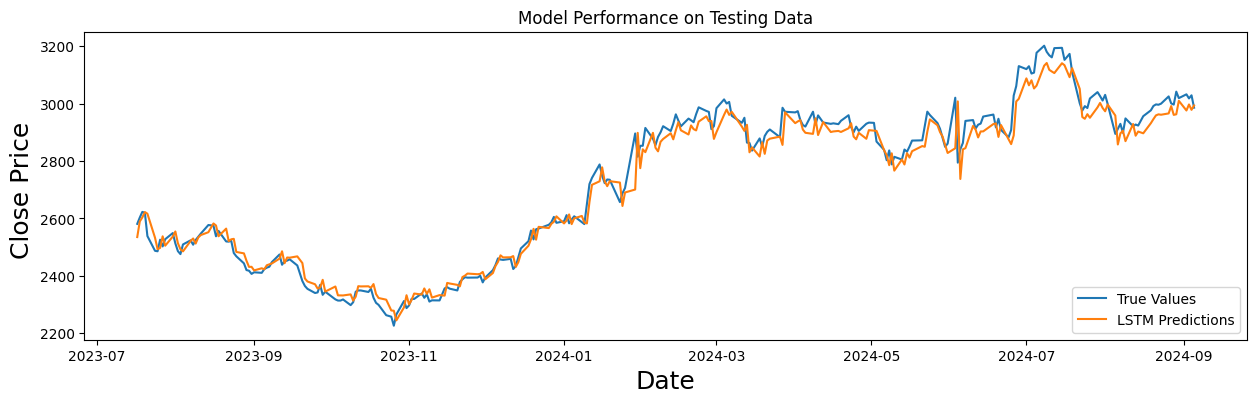

In [ ]:
# Plot only the testing data's true values and LSTM predictions
valid.loc[:,'Predictions'] = predictions

plt.figure(figsize=(15,4))
plt.title('Model Performance on Testing Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(valid['Close'], label='True Values')
plt.plot(valid['Predictions'], label='LSTM Predictions')
plt.legend(loc='lower right')
plt.show()


<ipython-input-47-0d214e092c8b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


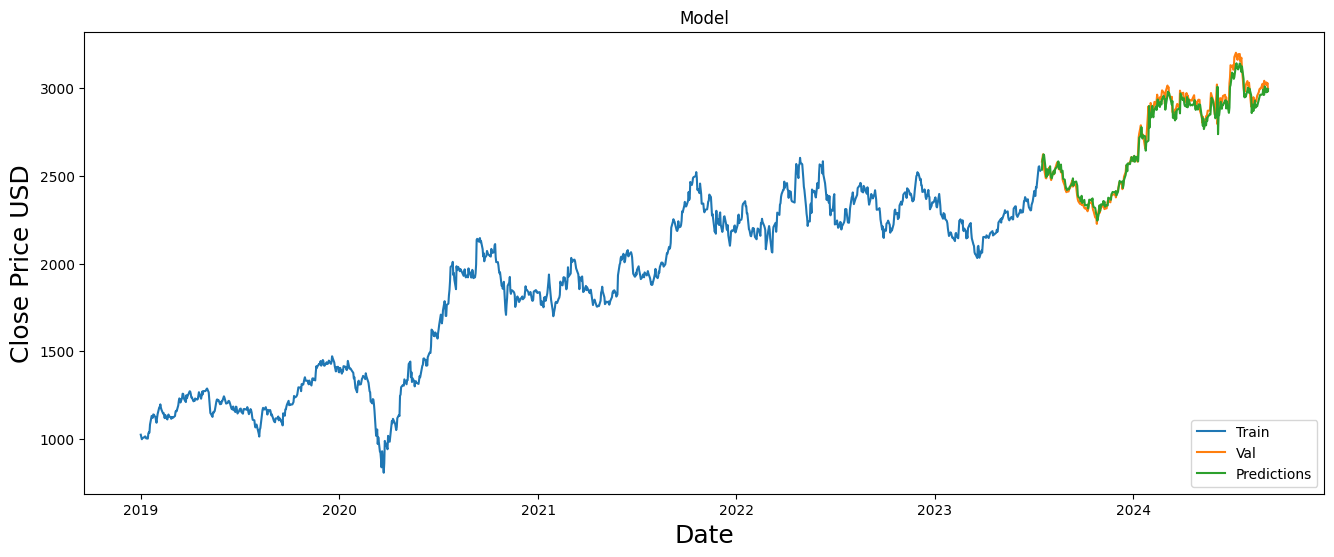

In [ ]:
# PLOT THE CURVE FOR TRUE VALUES AND OVERLAP IT LSTM values

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'Root Mean Squared Error (RMSE): {rmse}')
mape = mean_absolute_percentage_error(y_test, predictions)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Root Mean Squared Error (RMSE): 43.965070120636675
Mean Absolute Percentage Error (MAPE): 0.011639515052735097


In [ ]:
valid

,Close,Predictions
Date,,
2023-07-17,2581.353271,2535.339844
2023-07-18,2603.274414,2589.842285
2023-07-19,2623.026611,2603.567139
2023-07-20,2619.850098,2622.413818
2023-07-21,2538.750000,2616.705566
...,...,...
2024-08-30,3019.250000,3009.939941
2024-09-02,3032.500000,2976.214600
2024-09-03,3018.250000,2997.221436


In [ ]:
# Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')



Mean Absolute Percentage Error (MAPE): 0.011639515052735097


In [ ]:
55//1.0

55.0